## The incidence of chickenpox in France

The data on the incidence of chickenpox-like illness are available from the Web site of the [Réseau Sentinelles](http://www.sentiweb.fr/). We download them as a file in CSV format, in which each line corresponds to a week in the observation period. 

In [8]:
!pip install isoweek

In [4]:
%matplotlib inline
import  matplotlib.pyplot  as  plt
import  pandas  as  pd
import  isoweek 
import os

In [5]:
data_url =  "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv" 
filename = "inc-7-PAY-ds3.csv"

1. Download -> if there is not a local file already

In [6]:
if not os.path.exists(filename):
    raw_data = pd.read_csv(data_url, encoding =  'iso-8859-1' , skiprows= 1 )
else:
    raw_data = pd.read_csv(filename)

2. Remove rows with missing values

In [7]:
raw_data[raw_data.isnull(). any (axis= 1 )] 

week  indicator inc  inc_low  inc_up inc100  inc100_low  inc100_up  \
1883  198919          3   -      NaN     NaN      -         NaN        NaN   

     geo_insee geo_name  
1883        FR   France

In [8]:
data = raw_data.dropna().copy()
data 

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202524          3   22816   17621.0   28011.0     34        26.0   
1     202523          3   24564   19382.0   29746.0     37        29.0   
2     202522          3   18755   14333.0   23177.0     28        21.0   
3     202521          3   23760   18671.0   28849.0     35        27.0   
4     202520          3   20265   15814.0   24716.0     30        23.0   
5     202519          3   16264   12394.0   20134.0     24        18.0   
6     202518          3   18115   13975.0   22255.0     27        21.0   
7     202517          3   22150   17291.0   27009.0     33        26.0   
8     202516          3   28564   22550.0   34578.0     43        34.0   
9     202515          3   35721   29592.0   41850.0     53        44.0   
10    202514          3   37579   31232.0   43926.0     56        47.0   
11    202513          3   39673   33686.0   45660.0     59        50.0   
12    202512          3   52543   45627.0   59459.0     78        68.0   
13    202511          3   59469   52154.0   66784.0     89        78.0   
14    202510          3   60334   53048.0   67620.0     90        79.0   
15    202509          3   84531   74994.0   94068.0    126       112.0   
16    202508          3  136020  124824.0  147216.0    203       186.0   
17    202507          3  208952  195988.0  221916.0    312       293.0   
18    202506          3  273519  258159.0  288879.0    408       385.0   
19    202505          3  334395  318416.0  350374.0    499       475.0   
20    202504          3  350043  332885.0  367201.0    522       496.0   
21    202503          3  252772  238917.0  266627.0    377       356.0   
22    202502          3  257247  242991.0  271503.0    384       363.0   
23    202501          3  231549  214627.0  248471.0    345       320.0   
24    202452          3  201726  185870.0  217582.0    302       278.0   
25    202451          3  201697  187843.0  215551.0    302       281.0   
26    202450          3  136694  126369.0  147019.0    205       190.0   
27    202449          3  108487   99037.0  117937.0    163       149.0   
28    202448          3   87381   78687.0   96075.0    131       118.0   
29    202447          3   76286   67626.0   84946.0    114       101.0   
...      ...        ...     ...       ...       ...    ...         ...   
2090  198521          3   26096   19621.0   32571.0     47        35.0   
2091  198520          3   27896   20885.0   34907.0     51        38.0   
2092  198519          3   43154   32821.0   53487.0     78        59.0   
2093  198518          3   40555   29935.0   51175.0     74        55.0   
2094  198517          3   34053   24366.0   43740.0     62        44.0   
2095  198516          3   50362   36451.0   64273.0     91        66.0   
2096  198515          3   63881   45538.0   82224.0    116        83.0   
2097  198514          3  134545  114400.0  154690.0    244       207.0   
2098  198513          3  197206  176080.0  218332.0    357       319.0   
2099  198512          3  245240  223304.0  267176.0    445       405.0   
2100  198511          3  276205  252399.0  300011.0    501       458.0   
2101  198510          3  353231  326279.0  380183.0    640       591.0   
2102  198509          3  369895  341109.0  398681.0    670       618.0   
2103  198508          3  389886  359529.0  420243.0    707       652.0   
2104  198507          3  471852  432599.0  511105.0    855       784.0   
2105  198506          3  565825  518011.0  613639.0   1026       939.0   
2106  198505          3  637302  592795.0  681809.0   1155      1074.0   
2107  198504          3  424937  390794.0  459080.0    770       708.0   
2108  198503          3  213901  174689.0  253113.0    388       317.0   
2109  198502          3   97586   80949.0  114223.0    177       147.0   
2110  198501          3   85489   65918.0  105060.0    155       120.0   
2111  198452          3   84830   60602.0  109058.0    154       110.0   
2112  198451

3. Convert 'week' to period 

In [10]:
def convert_week ( year_and_week_int ):
    year_and_week_str =  str (year_and_week_int)
    year =  int (year_and_week_str[: 4 ])
    week =  int (year_and_week_str[ 4 :])
    w = isoweek.Week(year, week)
    return  pd.Period(w.day( 0 ),  'W' )

data[ 'period' ] = [convert_week(yw)  for  yw  in  data[ 'week' ]] 

4. Set 'period' as index and sort the dataset

In [44]:
sorted_data = data.set_index( 'period' ).sort_index() 
# Ensure the 'inc' column is numeric
sorted_data['inc'] = pd.to_numeric(sorted_data['inc'], errors='coerce')

In [45]:
periods = sorted_data.index
for  p1, p2  in  zip (periods[:- 1 ], periods[ 1 :]):
    delta = p2.to_timestamp() - p1.end_time
    if  delta > pd.Timedelta( '1s' ):
        print (p1, p2) 

1989-05-01/1989-05-07 1989-05-15/1989-05-21


5. Choose September 1st as the beginning of each annual period

In [46]:
first_sept_week = [pd.Period(pd.Timestamp(y,  9 ,  1 ),  'W' )
                      for  y  in  range ( 1985 ,
                                    sorted_data.index[- 1 ].year)] 
first_sept_week

[Period('1985-08-26/1985-09-01', 'W-SUN'),
 Period('1986-09-01/1986-09-07', 'W-SUN'),
 Period('1987-08-31/1987-09-06', 'W-SUN'),
 Period('1988-08-29/1988-09-04', 'W-SUN'),
 Period('1989-08-28/1989-09-03', 'W-SUN'),
 Period('1990-08-27/1990-09-02', 'W-SUN'),
 Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN'),
 Period('1995-08-28/1995-09-03', 'W-SUN'),
 Period('1996-08-26/1996-09-01', 'W-SUN'),
 Period('1997-09-01/1997-09-07', 'W-SUN'),
 Period('1998-08-31/1998-09-06', 'W-SUN'),
 Period('1999-08-30/1999-09-05', 'W-SUN'),
 Period('2000-08-28/2000-09-03', 'W-SUN'),
 Period('2001-08-27/2001-09-02', 'W-SUN'),
 Period('2002-08-26/2002-09-01', 'W-SUN'),
 Period('2003-09-01/2003-09-07', 'W-SUN'),
 Period('2004-08-30/2004-09-05', 'W-SUN'),
 Period('2005-08-29/2005-09-04', 'W-SUN'),
 Period('2006-08-28/2006-09-03', 'W-SUN'),
 Period('2007-08-27/2007-09-02', 'W-SUN'),
 Period('20

6. Collect the incidence per year information

In [47]:
year = []
yearly_incidence = []
for week1, week2  in  zip (first_sept_week[:- 1 ],first_sept_week[ 1 :]):
    one_year = sorted_data[ 'inc' ][week1:week2- 1 ]
    assert  abs ( len (one_year)- 52 ) <  2 
    yearly_incidence.append(one_year. sum ())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year) 
yearly_incidence.sort_values()

2021     772545
2014    1601698
1991    1663610
1995    1828304
2020    2017296
2022    2057596
2012    2183912
2003    2234514
2019    2254363
2006    2297262
2017    2322818
2001    2540826
1992    2590314
1993    2699482
2018    2701716
1988    2759663
2007    2786458
2011    2852504
2016    2859019
1987    2867464
2023    2908672
2008    2984311
1998    3047298
2002    3115484
1994    3514133
1996    3540251
2009    3558474
2004    3572810
1997    3624129
2015    3647492
2024    3691245
2000    3808190
2005    3831409
1999    3914003
2010    3992174
2013    4176872
1986    5050543
1990    5214494
1989    5461328
dtype: int64

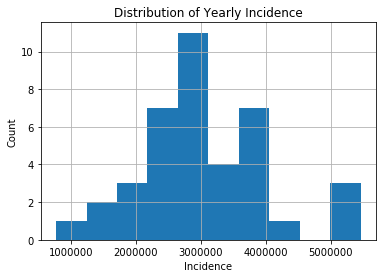

In [48]:
yearly_incidence.hist()
plt.title("Distribution of Yearly Incidence")
plt.xlabel("Incidence")
plt.ylabel("Count")
plt.show()

In [50]:
strongest = yearly_incidence.idxmax()
weakest = yearly_incidence.idxmin()
print(f"Strongest epidemic year: {strongest}")
print(f"Weakest epidemic year: {weakest}")

Strongest epidemic year: 1989
Weakest epidemic year: 2021
